In [ ]:
import pandas as pd
import numpy as np
import sklearn
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import DistanceMetric
from scipy.spatial.distance import euclidean

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
caminho = '/content/drive/MyDrive/Pos data science/Projetos/Mat_3_Algo_N_Super/Proj_Final/Country-data.csv'

In [ ]:
df = pd.read_csv(caminho)
df.shape

(167, 10)


# Verificação de interação com com a Matriz de Correlação e Pré Precessamento de Dados




##### Vamos realizar uma matriz para verificar o grau de interação entre os pontos.

<ipython-input-4-9942d22a3d97>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = df.corr(method='pearson')


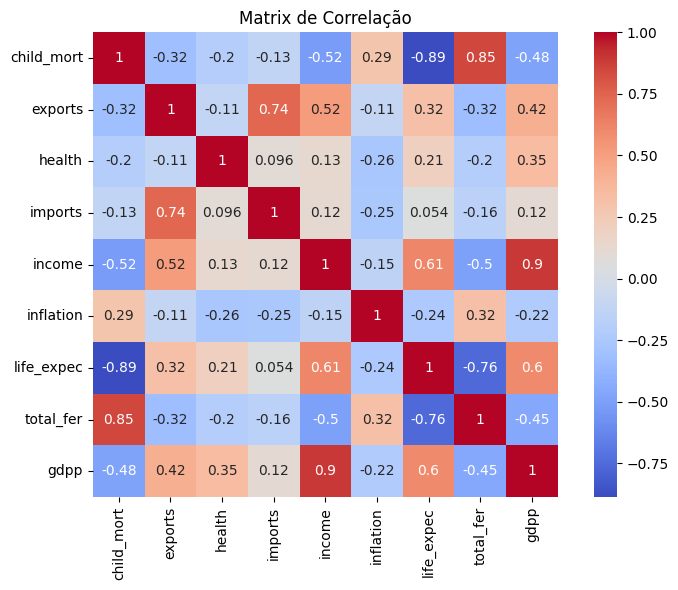

In [ ]:
corrmatrix = df.corr(method='pearson')
plt.subplots(figsize=(8,6))
sns.heatmap(corrmatrix,
            xticklabels=corrmatrix.columns,
            yticklabels=corrmatrix.columns,
            cmap="coolwarm",
            square=True, annot=True)
plt.title('Matrix de Correlação')
# sns.heatmap(corrmatrix, square=True, linewidths=.5, annot=True)
plt.tight_layout()
plt.show()

# ESCOLHA DOS DADOS:
##### Para verificamos a quantidade dos dados, usaremos o "describe().T".
##### O código irá nos informar alguns dados estatísticos como valores mínimo/máximo, contagem de valores, desvio padrão, etc.
##### Pode-se verificar abaixo que a quantidade de países descritos no dataset é de 167.

In [ ]:
num_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

df.set_index('country', inplace=True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


# FAIXA DINÂMICA
##### Agora, usaremos o box plot para identificar a distribuição dos dados.

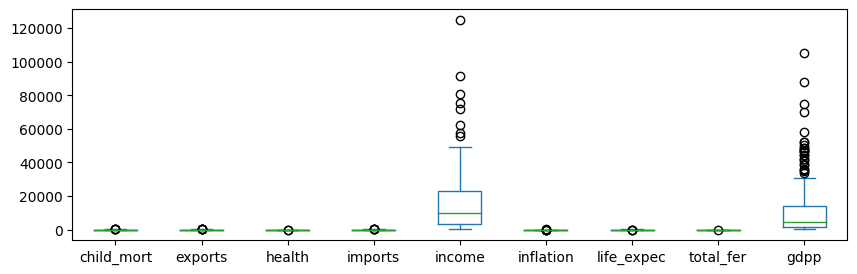

In [ ]:
fig, ax = plt.subplots()
df.plot(kind='box', ax=ax, figsize=(10,3))
fig.show()

##### Pode-se verificar que há uma grande diferença na escala dos nossos dados em comparação a Income e GDPP.
##### Será necessário dimensionar os dados. Isso nos dará uma melhor visão para a interpretação dos pontos.

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),
                         index=df.index,
                         columns=df.columns)
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754


##### Com a normalização dos dados, é possivel analizar melhor e ver quais ferramentas teremos que usar.



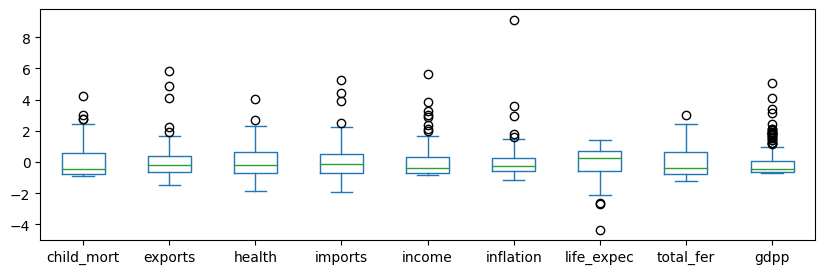

In [ ]:
fig, ax = plt.subplots()
df_scaled.plot(kind='box', ax=ax, figsize=(10,3))
fig.show()

##### Agora, calcularemos a distância euclidiana.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


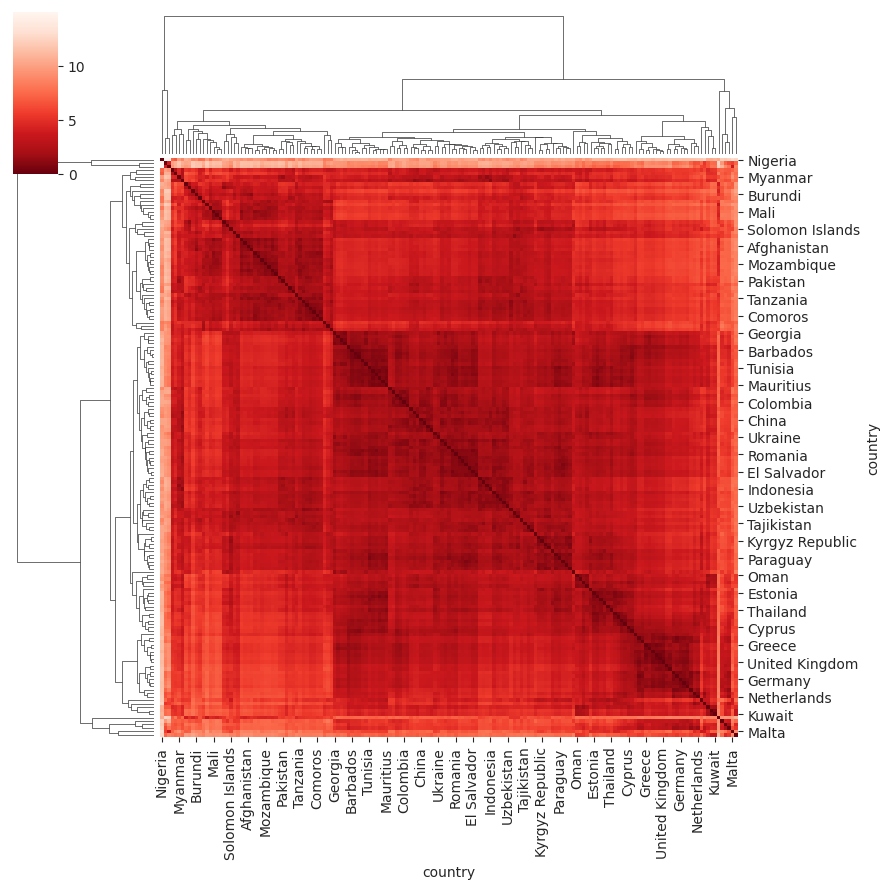

In [ ]:

euclidean = DistanceMetric.get_metric('euclidean')

distances = euclidean.pairwise(df_scaled)
distances = pd.DataFrame(distances,
                         index=df_scaled.index,
                         columns=df_scaled.index)

sns.clustermap(distances, cmap='Reds_r', vmin=0, figsize=(9,9))

##### Tudo pronto para executar o agrupamento k-means. Especifiquei o valor 3 para o número de clusters.

# K - Means e Clusterização Hieráquica

### K-Means: Uma Visão Detalhada

O algoritmo K-Means é um método de agrupamento amplamente utilizado que busca classificar pontos de dados em clusters homogêneos. O processo é definido pelas seguintes etapas:

Inicialização dos Centroides:

Seleciona-se um número predefinido de centroides (pontos representativos) de forma aleatória no espaço dos dados. Esses centroides inicializam os clusters.
Atribuição de Pontos aos Clusters:

Calcula-se a distância entre cada ponto de dados e os centroides.
O ponto é atribuído ao cluster cujo centróide está mais próximo, com base em medidas de distância, como a distância euclidiana.
Atualização dos Centroides:

Recalcula-se o centróide de cada cluster, ajustando-o para ser o ponto médio de todos os pontos atribuídos a esse cluster.
Repetição:

Os passos 2 e 3 são repetidos iterativamente até que a convergência seja alcançada. A convergência ocorre quando a atribuição de pontos aos clusters não muda significativamente entre iterações consecutivas.
Ao seguir essas etapas, o K-Means busca encontrar a configuração ótima dos clusters, minimizando a variação interna dos pontos dentro de cada cluster e maximizando a variação entre os clusters. Esse processo eficaz de atribuição e atualização dos centroides leva à formação de clusters distintos com características semelhantes.

Colocarei 3 cluster para a convergência.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(df_scaled)

clusters = kmeans.predict(df_scaled)

results = df_scaled.copy()
results['cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### Abaixo, podemos observar o número de países que cada cluster possui.



In [ ]:
results.cluster.value_counts().sort_index()

0    47
1    84
2    36
Name: cluster, dtype: int64

##### Agora, vamos identificar qual os país que melhor representa cada cluster. A representação é gerada obetndo o país que possui a menor distância em relação ao cluster, também chamado de medóide.

In [ ]:
def get_distance(dist):
    return euclidean(cluster, dist)

for idx in range(3):
    cluster = kmeans.cluster_centers_[idx, :]
    country = df_scaled[results.cluster == idx]
    distances = country.apply(get_distance, axis=1)
    dist_min = distances.argmin()
    print(f"O país que mais representa o cluster {idx} é o {distances.index[dist_min]} ({distances[dist_min]:.2f})."
          ,f"\n{df.loc[df[results.cluster == idx].index[dist_min], ['child_mort', 'total_fer', 'life_expec', 'gdpp']]}"
          , "\n------------------------------------------------------------ " )
    print()

O país que mais representa o cluster 0 é o Guinea (0.83). 
child_mort    109.00
total_fer       5.34
life_expec     58.00
gdpp          648.00
Name: Guinea, dtype: float64 
------------------------------------------------------------ 

O país que mais representa o cluster 1 é o Jamaica (0.73). 
child_mort      18.10
total_fer        2.17
life_expec      74.70
gdpp          4680.00
Name: Jamaica, dtype: float64 
------------------------------------------------------------ 

O país que mais representa o cluster 2 é o Iceland (0.73). 
child_mort        2.6
total_fer         2.2
life_expec       82.0
gdpp          41900.0
Name: Iceland, dtype: float64 
------------------------------------------------------------ 



In [ ]:
centers = kmeans.cluster_centers_
centers.shape

(3, 9)

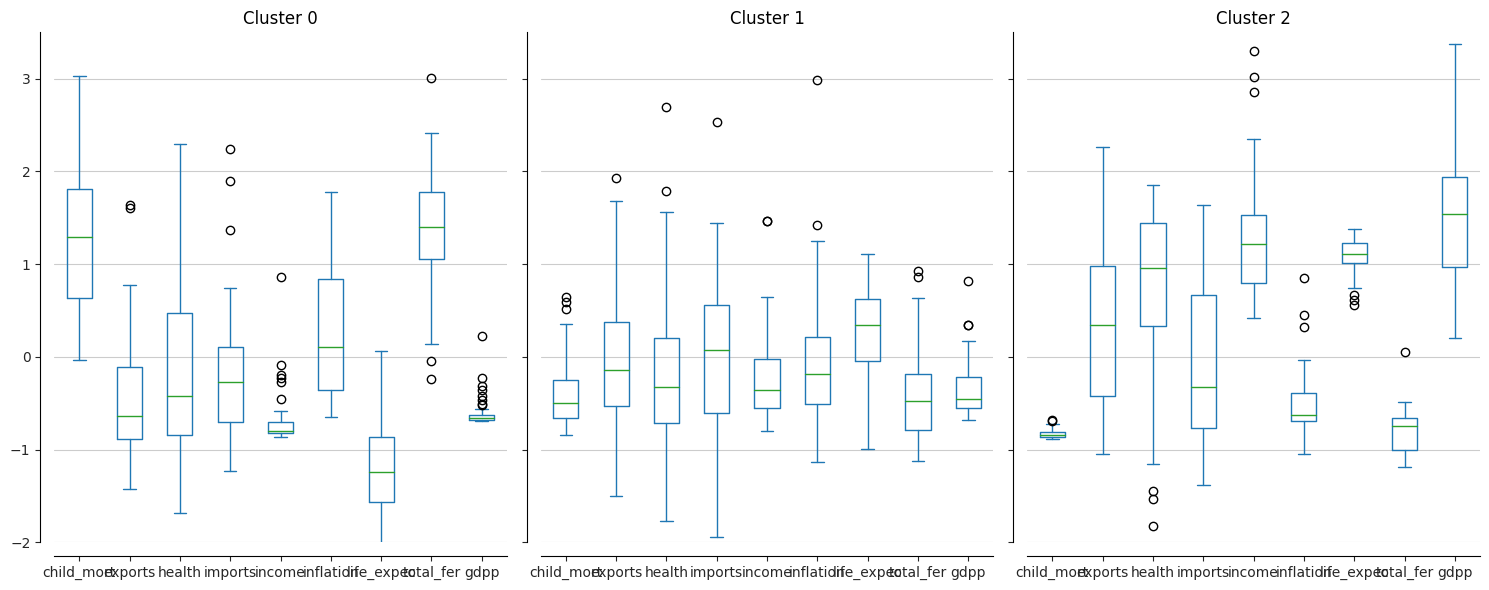

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

sns.set_style('ticks')
for idx in range(0, 3):
  df_scaled[results.cluster==idx].plot(kind='box', ax=axes[idx])
  axes[idx].set_title(f'Cluster {idx}')
  axes[idx].yaxis.grid(True)
  axes[idx].set_ylim([-2, 3.5])
  sns.despine(offset=10)

fig.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

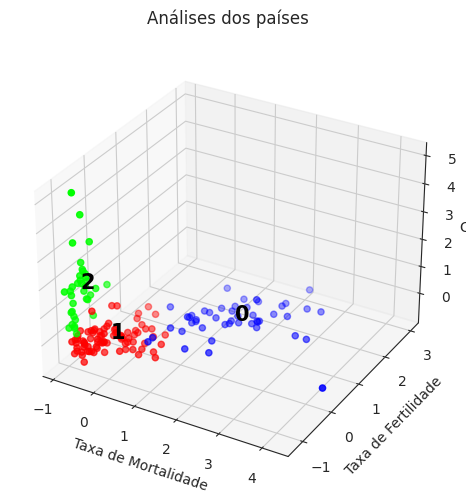

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.suptitle("Análises dos países")
ax = plt.axes(projection='3d')
ax.set_xlabel("Taxa de Mortalidade")
ax.set_ylabel("Taxa de Fertilidade")
ax.set_zlabel("GDPP")
ax.scatter3D(results.child_mort,
             results.total_fer,
             results.gdpp,
             c = results.cluster, cmap = "brg")
for j in range(3):
    ax.text(centers[j, num_cols.index('child_mort')],
            centers[j, num_cols.index('total_fer')],
            centers[j, num_cols.index('gdpp')],
            c='black', s=j, fontsize=15, fontweight=700)
plt.tight_layout()
plt.show

Por fim, observa-se que o algoritmo K-Means efetivamente separou os grupos relacionados ao desenvolvimento dos países.

Como evidenciado pela Matriz de Correlação, a Taxa de Mortalidade Infantil, a Fertilidade e o GDPP (PIB per Capita) destacaram-se como dados cruciais para esta análise.

O Cluster 0 é caracterizado por países subdesenvolvidos, demonstrando altas Taxas de Mortalidade Infantil e Fertilidade, inversamente proporcionais a um baixo GDPP. O país que melhor representa esse cluster é a Guiné.

O Cluster 1 descreve países em desenvolvimento, apresentando Taxas de Mortalidade Infantil e Fertilidade menos elevadas em comparação ao Cluster 0. O GDPP exibe um índice intermediário. O país que mais representa este cluster é a Jamaica.

O Cluster 2 abrange países desenvolvidos, com baixas Taxas de Mortalidade Infantil e Fertilidade, além de um GDPP significativamente alto em relação aos demais. O país que mais representa este cluster é a Islândia, reconhecida como um dos países mais seguros para se viver.

### Clusterização Hierárquica

Para a Clusterização Hierárquica, irei utilizar os dados de Expectativa de Vida e Taxa de Mortalidade Infantil dos países.

Text(0, 0.5, 'Child Mortality Rate')

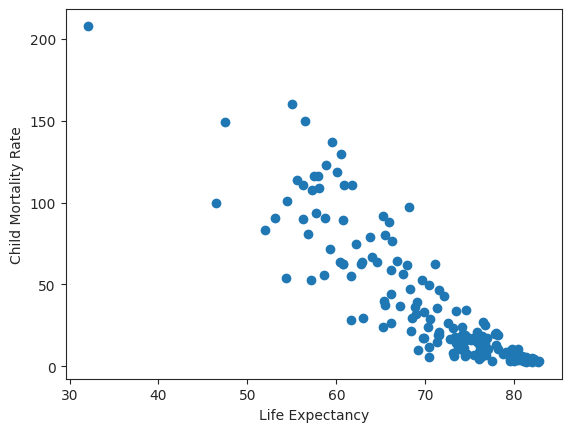

In [ ]:
data = df[[ 'life_expec', 'child_mort']]
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.xlabel("Life Expectancy")
plt.ylabel("Child Mortality Rate")

<ipython-input-56-53bfdef177c1>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = sch.linkage(data, method="ward")


Text(0, 0.5, 'Distance')

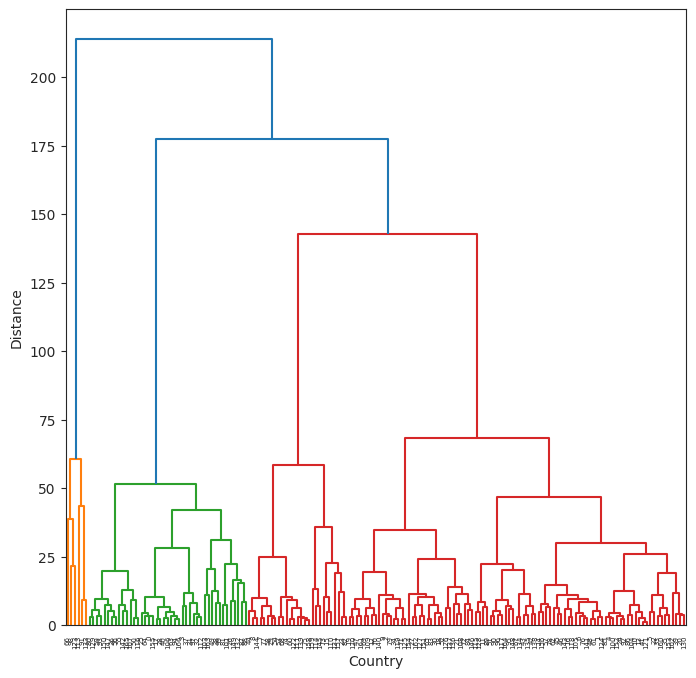

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

linkage = sch.linkage(data, method="ward")

dend = sch.dendrogram(linkage, get_leaves=True)
plt.xlabel("Country")
plt.ylabel("Distance")

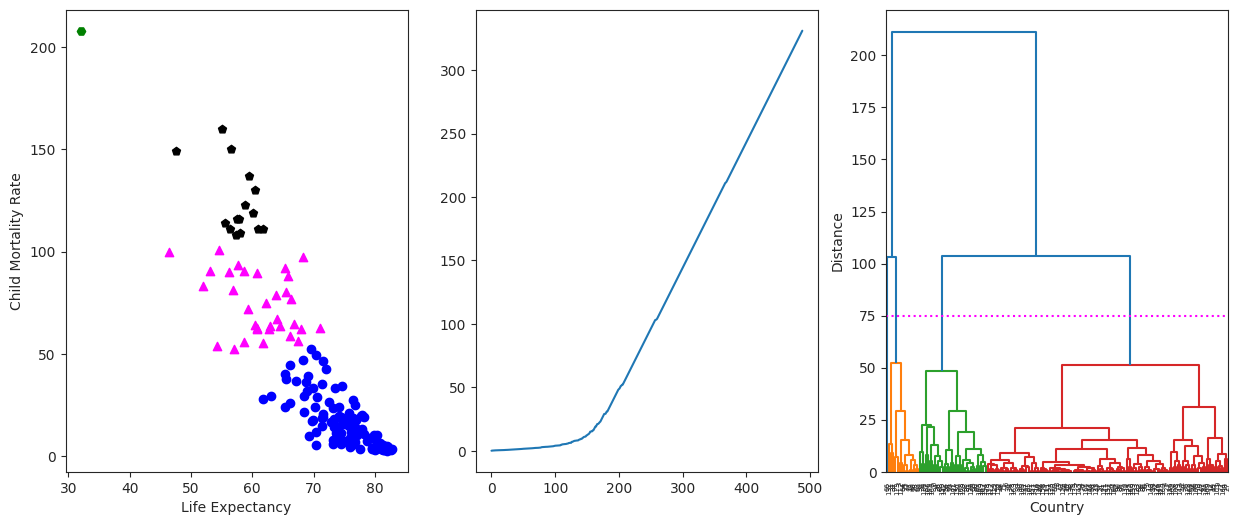

In [ ]:
from sklearn.cluster import AgglomerativeClustering

distance_threshold = 75
linkage_method =  'complete'

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

ax = axes[2]
linkage =  sch.linkage(data, method=linkage_method)
dend = sch.dendrogram(linkage, color_threshold=distance_threshold,
                      get_leaves=True);
ax.set_xlabel("Country")
ax.set_ylabel("Distance")
ax.axhline(distance_threshold, c='magenta', ls=":")

axes[1].plot(np.unique(linkage))

ax = axes[0]
model = AgglomerativeClustering(n_clusters=None,
                                linkage=linkage_method,
                                distance_threshold=distance_threshold)
clusters = model.fit(data)

labels = model.labels_

colors = ['k', 'b', 'magenta', 'g', 'r'] * 10
markers = ['p', "o", '^', 'H'] * 10

for cluster in np.unique(labels):
    indices = np.where(labels == cluster)[0]
    ax.scatter(data.iloc[indices, 0], data.iloc[indices, 1], c=colors[cluster], marker=markers[cluster])
    ax.set_xlabel("Life Expectancy")
    ax.set_ylabel("Child Mortality Rate")

In [ ]:
output_rows = []
input = data
for index, (leave, cluster) in enumerate(zip(dend['leaves'], dend['leaves_color_list'])):
    output_row = {
        'Country': input.index[leave],
        'Child Mort': input.child_mort[leave],
        'Life Expec' : input.life_expec[leave],
        'Leave': leave,
        'Cluster': cluster
    }
    output_rows.append(output_row)

output_df = pd.DataFrame(output_rows)

cluster_counts = output_df['Cluster'].value_counts()

##### Vamos olhar de perto os clusters e observar quais países eles estão representando.

In [ ]:
cluster_counts

C3    118
C2     33
C1     15
C0      1
Name: Cluster, dtype: int64

In [ ]:
output_df[output_df['Cluster'] == 'C0']

,Country,Child Mort,Life Expec,Leave,Cluster
0,Haiti,208.0,32.1,66,C0


In [ ]:
output_df[output_df['Cluster'] == 'C1']

,Country,Child Mort,Life Expec,Leave,Cluster
1,Sierra Leone,160.0,55.0,132,C1
2,Central African Republic,149.0,47.5,31,C1
3,Chad,150.0,56.5,32,C1
4,Mali,137.0,59.5,97,C1
5,Nigeria,130.0,60.5,113,C1
6,Angola,119.0,60.1,3,C1
7,Niger,123.0,58.8,112,C1
8,Guinea-Bissau,114.0,55.6,64,C1
9,Burkina Faso,116.0,57.9,25,C1
10,"Congo, Dem. Rep.",116.0,57.5,37,C1


In [ ]:
output_df[output_df['Cluster'] == 'C2']

,Country,Child Mort,Life Expec,Leave,Cluster
16,Mauritania,97.4,68.2,99,C2
17,Comoros,88.2,65.9,36,C2
18,Pakistan,92.1,65.3,116,C2
19,Lesotho,99.7,46.5,87,C2
20,Mozambique,101.0,54.5,106,C2
21,Uganda,81.0,56.8,155,C2
22,Zambia,83.1,52.0,166,C2
23,Afghanistan,90.2,56.2,0,C2
24,Malawi,90.5,53.1,94,C2
25,Burundi,93.6,57.7,26,C2


In [ ]:
output_df[output_df['Cluster'] == 'C3']

,Country,Child Mort,Life Expec,Leave,Cluster
49,Jordan,21.1,75.8,78,C3
50,Turkey,19.1,78.2,153,C3
51,Panama,19.7,77.8,117,C3
52,Peru,20.3,77.9,119,C3
53,Colombia,18.6,76.4,35,C3
...,...,...,...,...,...
162,Azerbaijan,39.2,69.1,9,C3
163,Iraq,36.9,67.2,72,C3
164,Uzbekistan,36.3,68.8,161,C3
165,Bhutan,42.7,72.1,18,C3


In [ ]:
output_df['Life Expec'][output_df['Cluster'] == 'C1'].min()

47.5

## Semelhanças e Diferenças

##### Pode-se notar uma diferença dos países encontrados no K-Means e na Clusterização Hierárquica.

##### A Jamaica está lincada ao grupo 3, o mesmo grupo da Islândia.

In [ ]:
output_df[output_df['Country'] == 'Jamaica']

,Country,Child Mort,Life Expec,Leave,Cluster
59,Jamaica,18.1,74.7,76,C3


In [ ]:
output_df[output_df['Country'] == 'Iceland']

,Country,Child Mort,Life Expec,Leave,Cluster
100,Iceland,2.6,82.0,68,C3


##### Porém, a Guinea permaneceu no mesmo grupo que encontamos anteriormente.

In [ ]:
output_df[output_df['Country'] == 'Guinea']

,Country,Child Mort,Life Expec,Leave,Cluster
15,Guinea,109.0,58.0,63,C1


In [ ]:
max_life = data['child_mort'].max()

country = data[data['child_mort'] == max_life][['child_mort']]

print(country)

         child_mort
country            
Haiti         208.0


**Análise Final:**

Ao examinar o gráfico gerado pela Clusterização Hierárquica, evidencia-se uma clara separação entre os três grupos de países identificados, além da presença de um outlier notável, o Haiti.

A determinação do melhor ponto de corte para definir os três grupos revelou-se eficaz na região de 75, proporcionando uma segmentação robusta dos países.

Os grupos formam uma linha decrescente, cada um caracterizado por diferentes faixas de taxa de mortalidade e expectativa de vida:

1. **Grupo 1:** Agrega 15 países com taxas de mortalidade elevadas e expectativa de vida entre 47.5 e 61.8.

2. **Grupo 2:** Inclui 33 países com taxas de mortalidade variando entre 100 e 50, e a expectativa de vida permanece entre 46.5 e 71.1.

3. **Grupo 3:** Composto por 118 países, apresenta taxas de mortalidade abaixo de 60, e a expectativa de vida oscila entre 61.7 e 82.8.

Essa segmentação proporciona uma visão clara das disparidades nos indicadores de mortalidade e expectativa de vida entre os grupos, permitindo uma análise mais aprofundada das características distintivas de cada conjunto de países.

#DBSCAN

##### Agora, usaremos o modelo DBSCAN

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import DBSCAN
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

##### Após realizar alguns testes, percebi a melhor distância máxima entre duas amostras para representar o probelema foi a de 1.25, como um número de amostras de 5 pontos.

In [ ]:
gap_enc = pd.DataFrame(df_scaled, columns=num_cols, index=df.index)
dbscan = DBSCAN(eps=1.25, min_samples=5)
gap_enc['cluster'] = dbscan.fit_predict(gap_enc)
gap_enc.cluster.value_counts().sort_index()


-1    49
 0    24
 1    76
 2    18
Name: cluster, dtype: int64

In [ ]:
gap_enc[['cluster'] + num_cols].groupby(['cluster']).mean().T

cluster,-1,0,1,2
child_mort,0.333656,1.350289,-0.440677,-0.848036
exports,0.399496,-0.603927,-0.019355,-0.200557
health,0.039729,-0.486966,-0.161830,1.224421
imports,0.348390,-0.351061,0.007874,-0.513559
income,0.352807,-0.787256,-0.227704,1.050672
inflation,0.469163,0.021907,-0.165182,-0.608939
life_expec,-0.317703,-1.247845,0.319606,1.179204
total_fer,0.300986,1.566359,-0.508034,-0.762798
gdpp,0.233729,-0.665772,-0.305761,1.542423


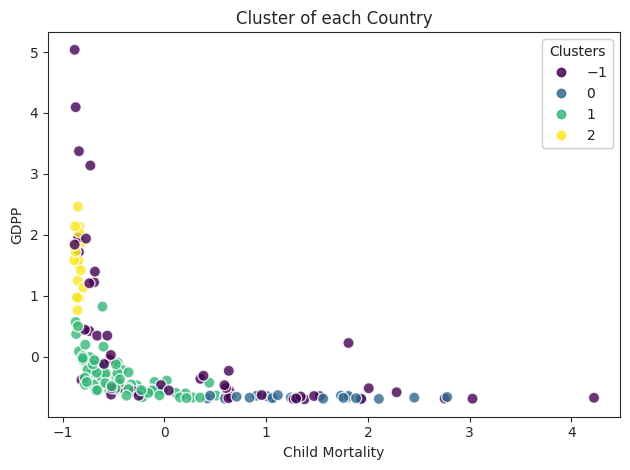

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Cluster of each Country")
ax.set_xlabel("Child Mortality")
ax.set_ylabel("GDPP")

sc = ax.scatter(gap_enc.child_mort, gap_enc.gdpp, c=dbscan.labels_, cmap='viridis', edgecolors='white', s=64, alpha=0.8)

legend = ax.legend(*sc.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.tight_layout()
plt.show()


In [ ]:
gap_enc[['child_mort', 'gdpp', 'cluster']][gap_enc['cluster'] == -1]

,child_mort,gdpp,cluster
country,,,
Angola,2.007808,-0.516268,-1
Bahrain,-0.737914,0.423331,-1
Belarus,-0.815013,-0.379460,-1
Belgium,-0.839884,1.720274,-1
Botswana,0.353908,-0.361949,-1
Brunei,-0.690660,1.222291,-1
Burundi,1.376093,-0.696801,-1
Central African Republic,2.753928,-0.685035,-1
"Congo, Dem. Rep.",1.933196,-0.691164,-1


In [ ]:
gap_enc[['child_mort', 'gdpp', 'cluster']][gap_enc['cluster'] == 0]

,child_mort,gdpp,cluster
country,,,
Afghanistan,1.291532,-0.679180,0
Benin,1.808842,-0.667961,0
Burkina Faso,1.933196,-0.677976,0
Cameroon,1.734230,-0.637754,0
Chad,2.778798,-0.660355,0
Comoros,1.241791,-0.667359,0
Cote d'Ivoire,1.808842,-0.642679,0
Eritrea,0.421059,-0.683065,0
Gambia,1.045313,-0.678687,0


In [ ]:
gap_enc[['child_mort', 'gdpp', 'cluster']][gap_enc['cluster'] == 1]

,child_mort,gdpp,cluster
country,,,
Albania,-0.538949,-0.485623,1
Algeria,-0.272833,-0.465376,1
Antigua and Barbuda,-0.695634,-0.041817,1
Argentina,-0.591177,-0.145791,1
Armenia,-0.501643,-0.533233,1
...,...,...,...
Ukraine,-0.660815,-0.546913,1
Uruguay,-0.688173,-0.058234,1
Uzbekistan,-0.048997,-0.633923,1


In [ ]:
gap_enc[['child_mort', 'gdpp', 'cluster']][gap_enc['cluster'] == 2]

,child_mort,gdpp,cluster
country,,,
Australia,-0.832423,2.130699,2
Austria,-0.844858,1.857082,2
Canada,-0.812526,1.884444,2
Denmark,-0.849832,2.464511,2
Finland,-0.877190,1.818776,2
France,-0.847345,1.512325,2
Germany,-0.847345,1.577993,2
Greece,-0.854806,0.762616,2
Iceland,-0.887138,1.583465,2


##### **Conclusão da Análise do DBSCAN:**

A aplicação do algoritmo DBSCAN revelou insights valiosos sobre a distribuição dos países no conjunto de dados. Diferentemente do K-Means, o DBSCAN, ao operar com o conceito de densidade de pontos, demonstrou robustez na identificação de agrupamentos e uma maior capacidade de lidar com dados que apresentam densidades variáveis.

Ao adotar um raio de vizinhança de 1.25 e um mínimo de 5 pontos para formar um cluster, o DBSCAN identificou três grupos distintos. O cluster -1, representando outliers ou pontos de baixa densidade, mosntrando países que se destacam significativamente dos demais em termos de mortalidade infantil e PIB per capita.

Foi possível obter uma visão mais detalhada dos clusters, destacando nuances que podem não ser capturadas por métodos tradicionais de agrupamento. A análise dos clusters gerados oferece uma compreensão mais profunda das disparidades entre países, especialmente em relação à taxa de mortalidade infantil e ao desenvolvimento econômico.

É importante ressaltar que a flexibilidade do DBSCAN em lidar com densidades variáveis e sua capacidade de identificar outliers o tornam uma escolha valiosa em cenários onde a distribuição dos dados é heterogênea e a presença de pontos atípicos pode influenciar significativamente a interpretação dos resultados.

# Conclusão: K-Means e DBSCAN

##### Os resultados obtidos indicam que o algoritmo K-Means é sensível a outliers, pois sua abordagem busca agrupar todos os pontos em um conjunto homogêneo. Isso significa que a presença de outliers pode distorcer o cálculo dos centróides e influenciar significativamente na formação dos clusters.

##### Por outro lado, o DBSCAN (Density-Based Spatial Clustering of Applications with Noise), ao empregar o conceito de densidade dos pontos, apresenta maior robustez na identificação de concentrações de dados. Este método se destaca ao não depender fortemente da média global dos pontos, sendo capaz de identificar grupos com formas mais complexas e, ao mesmo tempo, sendo menos impactado por pontos isolados ou atípicos.

##### Os outliers identificados pelo DBSCAN são aqueles pontos que estão consideravelmente distantes do agrupamento principal, os Clusters -1. Essa abordagem faz com que o algoritmo seja mais capaz de lidar com dados esparsos ou com agrupamentos de diferentes densidades, sendo uma escolha mais adequada em cenários nos quais os clusters podem variar em tamanho e forma.

##### Link: https://colab.research.google.com/drive/1PtAvT7rLFASsNjgA-JCb1n48-sXMZRuJ#scrollTo=8xVbGnmbPBdX